In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.isnull().values.any()

False

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
CompanyName=df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3,'CompanyName',CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


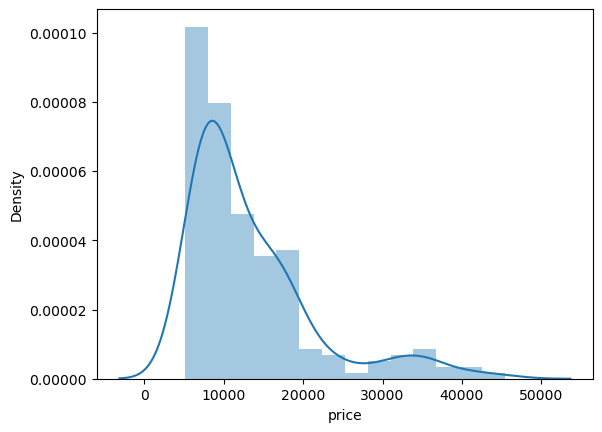

In [11]:
sns.distplot(df['price'])
plt.show()

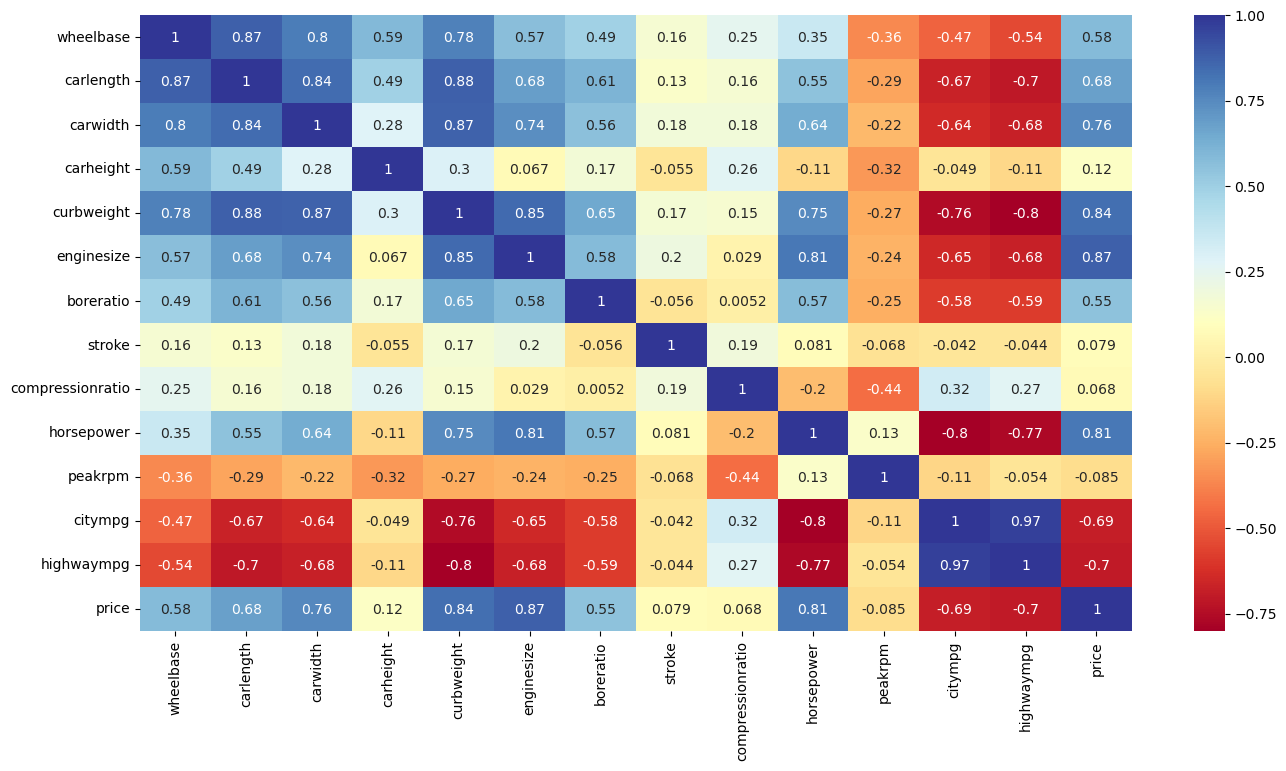

In [12]:
plt.figure(figsize=(16,8))

data = df.select_dtypes(include=['float64', 'int'])
data = data.drop(['symboling', 'car_ID'], axis=1)
data = data.corr()

sns.heatmap(data, cmap="RdYlBu", annot=True)
plt.show()

In [13]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [15]:
df.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
# checking the distribution of categorical data
print(df.fueltype.value_counts())
print(df.aspiration.value_counts())
print(df.carbody.value_counts())
print(df.drivewheel.value_counts())
print(df.enginetype.value_counts())
print(df.cylindernumber.value_counts())
print(df.doornumber.value_counts())
print(df.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [17]:
# encoding "FuelType" Column
df.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)

In [18]:
# encoding "aspiration" Column
df.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)

In [19]:
# encoding "carbody" Column
df.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)

In [20]:
# encoding "drivewheel" Column
df.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)

In [21]:
# encoding "enginetype" Column
df.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)

In [22]:
# encoding "cylindernumber" Column
df.replace({'cylindernumber':{'four':0,'six':1,'five':2,'eight':3,'two':4,'three':5,'twelve':6}},inplace=True)

In [23]:
# encoding "doornumber" Column
df.replace({'doornumber':{'four':0,'two':1}},inplace=True)

In [24]:
# encoding "fuelsystem" Column
df.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace=True)

In [25]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,0,0,1,4,1,front,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,0,0,1,4,1,front,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,0,0,1,1,1,front,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,0,0,0,0,0,front,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,0,0,0,0,2,front,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
X = df.drop(['CompanyName','enginelocation','price'],axis=1)
Y = df['price']

In [27]:
print(X)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         0           0           1        4           1   
1         2          3         0           0           1        4           1   
2         3          1         0           0           1        1           1   
3         4          2         0           0           0        0           0   
4         5          2         0           0           0        0           2   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         0           0           0        0           1   
201     202         -1         0           1           0        0           1   
202     203         -1         0           0           0        0           1   
203     204         -1         1           1           0        0           1   
204     205         -1         0           1           0        0           1   

     wheelbase  carlength  

In [28]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)

In [30]:

# loading the linear regression model
lin_reg_model = LinearRegression()

In [31]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [32]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8760853857144774


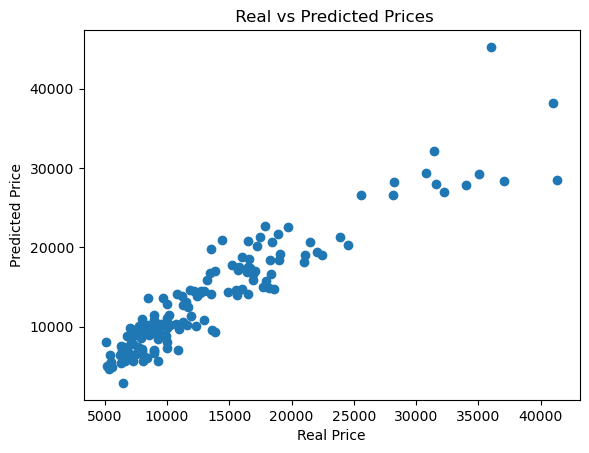

In [33]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title(" Real vs Predicted Prices")
plt.show()

In [34]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8934204393960505


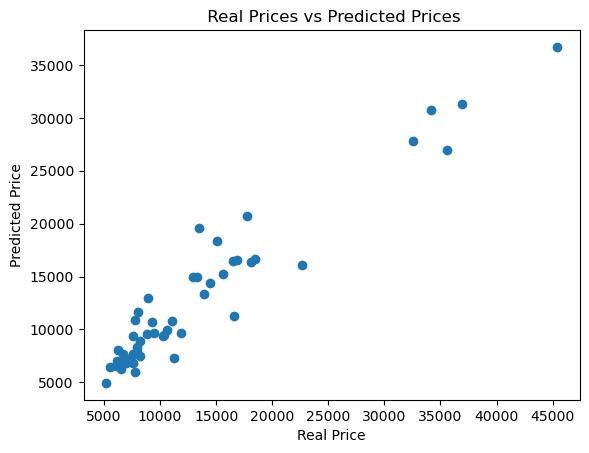

In [35]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title(" Real Prices vs Predicted Prices")
plt.show()

In [36]:
# loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.237e+06, tolerance: 8.930e+05
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [37]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8760556619393252


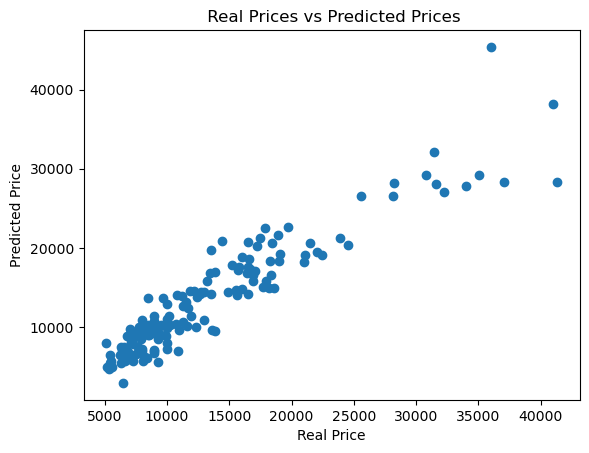

In [38]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title(" Real Prices vs Predicted Prices")
plt.show()

In [39]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8937058905380512


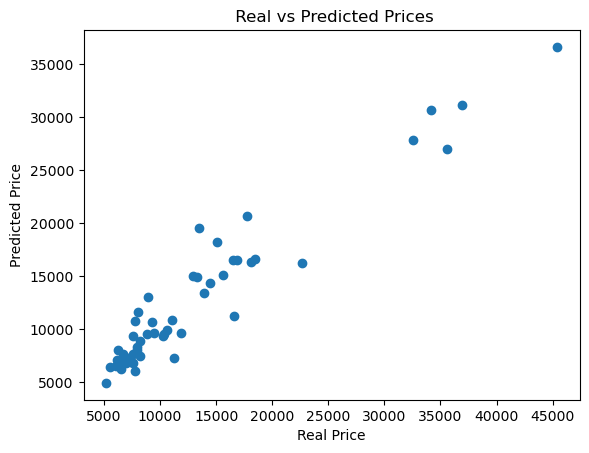

In [40]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title(" Real vs Predicted Prices")
plt.show()

In [41]:
#LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)
print("R2 score: ",r2_score(Y_test,Y_pred))

R2 score:  0.8934204393960505


# Thanks